# NON-SEQUENTIAL MODEL using functional API

In [1]:
## importing important libraries and datasets
import pandas as pd
import numpy as np


from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
housing = fetch_california_housing() 


### Splitting training and testing data

In [3]:
## splitting training and testing data
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)

## splitting validataion and training data
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [4]:
## checking shape of imported dataset
print("X training:", X_train_full.shape)
print("y training:", y_train_full.shape)
print("X test:", X_test.shape)
print("y test:", y_test.shape)

X training: (15480, 8)
y training: (15480,)
X test: (5160, 8)
y test: (5160,)


In [5]:
## checking datatype of imported dataset
print("X training datatype:", X_train_full.dtype)
print("y training datatype:", y_train_full.dtype)
print("X test datatype:", X_test.dtype)
print("y test datatype:", y_test.dtype)

X training datatype: float64
y training datatype: float64
X test datatype: float64
y test datatype: float64


In [6]:
## Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

## Building, Training and Evaluating the model

### I. Wide and Deep Neural Network

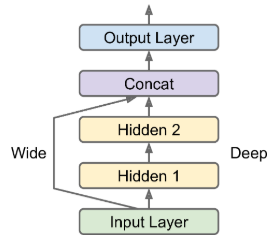

#### 1. Building the model

In [7]:
## First we have to import keras
import tensorflow as tf
from tensorflow import keras

In [8]:
input_ = keras.layers.Input(shape = X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)

model =keras.Model(inputs =[input_], outputs = [output])

#### 2. Compiling the model

In [9]:
model.compile(loss = 'mean_squared_error', optimizer = 'sgd')

#### 3. Fitting the model

In [12]:
housing_price = model.fit(X_train, y_train, epochs = 20, validation_data=(X_valid, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 0s 41us/sample - loss: nan - val_loss: nan
Epoch 2/20
11610/11610 [==============================] - 0s 42us/sample - loss: nan - val_loss: nan
Epoch 3/20
11610/11610 [==============================] - 0s 42us/sample - loss: nan - val_loss: nan
Epoch 4/20
11610/11610 [==============================] - 0s 42us/sample - loss: nan - val_loss: nan
Epoch 5/20
11610/11610 [==============================] - 0s 41us/sample - loss: nan - val_loss: nan
Epoch 6/20
11610/11610 [==============================] - 0s 40us/sample - loss: nan - val_loss: nan
Epoch 7/20
11610/11610 [==============================] - 0s 42us/sample - loss: nan - val_loss: nan
Epoch 8/20
11610/11610 [==============================] - 0s 42us/sample - loss: nan - val_loss: nan
Epoch 9/20
11610/11610 [==============================] - 0s 41us/sample - loss: nan - val_loss: nan
Epoch 10/20
11610/11610 [=================

#### 4. Evaluating the model

In [13]:
mse_test = model.evaluate(X_test, y_test)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

#### 5. Prediction on new instances

In [14]:
X_new = X_test[:3]
y_pred =model.predict(X_new)

In [15]:
y_pred

array([[nan],
       [nan],
       [nan]], dtype=float32)

### II. Handling Multiple Inputs

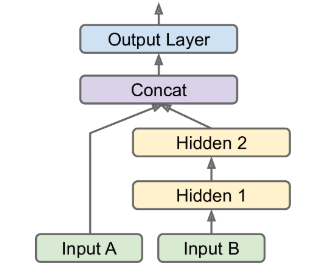

#### 1. Building the model


In [16]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)


model = keras.Model(inputs=[input_A, input_B], outputs=[output])

#### 2. Compiling the model

In [17]:
model.compile(loss = 'mse', optimizer=keras.optimizers.SGD(lr = 1e-3))

In [18]:
## giving differnt input data
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

#### 3. Fitting the model

In [19]:
housing_price_1 = model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 86us/sample - loss: 2.2207 - val_loss: 1.0112
Epoch 2/20
11610/11610 [==============================] - 1s 44us/sample - loss: 0.8657 - val_loss: 0.7577
Epoch 3/20
11610/11610 [==============================] - 0s 43us/sample - loss: 0.6966 - val_loss: 0.6620
Epoch 4/20
11610/11610 [==============================] - 1s 44us/sample - loss: 0.6344 - val_loss: 0.6153
Epoch 5/20
11610/11610 [==============================] - 1s 45us/sample - loss: 0.5953 - val_loss: 0.5809
Epoch 6/20
11610/11610 [==============================] - 1s 44us/sample - loss: 0.5659 - val_loss: 0.5552
Epoch 7/20
11610/11610 [==============================] - 0s 43us/sample - loss: 0.5436 - val_loss: 0.5360
Epoch 8/20
11610/11610 [==============================] - 1s 43us/sample - loss: 0.5252 - val_loss: 0.5200
Epoch 9/20
11610/11610 [==============================] - 1s 44us/sample - loss: 0.5109 - val_l

#### 4. Evaluating the model

In [20]:
mse_1 = model.evaluate((X_test_A, X_test_B), y_test)
mse_1

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.46448824461116345

#### 5. Predicting on new instances

In [21]:
y_pred = model.predict((X_new_A, X_new_B))

In [22]:
y_pred

array([[1.4905605],
       [1.812607 ],
       [2.5541942]], dtype=float32)

### III. Handling Multiple Outputs

Adding an auxilary output for regularization

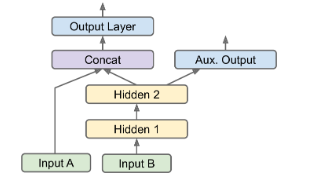

#### 1. Building the model


In [25]:


input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])

output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name ="aux_output")(hidden2)


model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])


#### 2. Compiling the model

In [26]:
model.compile(loss = ['mse', 'mse'], loss_weights= [0.9, 0.1], optimizer='sgd')

#### 3. Fitting the model

In [27]:
housing_prices_2 = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20, validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 113us/sample - loss: 0.8764 - main_output_loss: 0.7748 - aux_output_loss: 1.7887 - val_loss: 0.5910 - val_main_output_loss: 0.5289 - val_aux_output_loss: 1.1500
Epoch 2/20
11610/11610 [==============================] - 1s 50us/sample - loss: 0.5569 - main_output_loss: 0.5015 - aux_output_loss: 1.0579 - val_loss: 0.5032 - val_main_output_loss: 0.4553 - val_aux_output_loss: 0.9352
Epoch 3/20
11610/11610 [==============================] - 1s 53us/sample - loss: 0.4879 - main_output_loss: 0.4456 - aux_output_loss: 0.8703 - val_loss: 0.4747 - val_main_output_loss: 0.4368 - val_aux_output_loss: 0.8161
Epoch 4/20
11610/11610 [==============================] - 1s 53us/sample - loss: 0.4679 - main_output_loss: 0.4362 - aux_output_loss: 0.7531 - val_loss: 0.4466 - val_main_output_loss: 0.4165 - val_aux_output_loss: 0.7176
Epoch 5/20
11610/11610 [==============================] - 1s 56us/

#### 4. Evaluating the model

In [28]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

#### 5. Predicting on new instances

In [31]:
y_pred_main, Y_pred_aux = model.predict([X_new_A, X_new_B])

print("y_pred_main:",  y_pred_main)
print("Y_pred_aux:",  Y_pred_aux)

y_pred_main: [[0.9542049]
 [1.9969559]
 [3.0147188]]
Y_pred_aux: [[1.3922606]
 [2.54479  ]
 [2.9520454]]


## Saving and loading the model

In [34]:
## Saving the model
model.save("Keras_model.h5")

## loading the model
model = keras.models.load_model("Keras_model.h5")

## Fine Tuning Neural Network Hyperparameters

In [59]:
## Creating a function that will build and compile a Keras model, given a set of hyperparameters:
def build_model(n_hidden = 1, n_neurons = 30, learning_rate = 3e-3, input_shape = [8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape = input_shape))
    for layer in range (n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation = 'relu'))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr = learning_rate)
    model.compile(loss = 'mse', optimizer= optimizer)
    return model

This function creates a simple Sequential model for univariate regression (only one output neuron), with the given input shape and the given number of hidden layers and neurons, and it compiles it using an SGD optimizer configured with the specified learning rate.

In [60]:
## creating a KerasRegressor based on build_medil() function:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [61]:
## fitting the new model
keras_reg.fit(X_train, y_train, epochs = 100, validation_data = (X_valid, y_valid), callbacks = [keras.callbacks.EarlyStopping(patience = 10)])

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 71us/sample - loss: 1.2703 - val_loss: 0.6465
Epoch 2/100
11610/11610 [==============================] - 1s 43us/sample - loss: 0.6340 - val_loss: 0.5793
Epoch 3/100
11610/11610 [==============================] - 0s 42us/sample - loss: 0.5755 - val_loss: 0.5242
Epoch 4/100
11610/11610 [==============================] - 1s 48us/sample - loss: 0.5263 - val_loss: 0.4955
Epoch 5/100
11610/11610 [==============================] - 0s 41us/sample - loss: 0.4842 - val_loss: 0.4706
Epoch 6/100
11610/11610 [==============================] - 1s 44us/sample - loss: 0.4718 - val_loss: 0.4621
Epoch 7/100
11610/11610 [==============================] - 1s 49us/sample - loss: 0.4545 - val_loss: 0.4467
Epoch 8/100
11610/11610 [==============================] - 0s 37us/sample - loss: 0.4409 - val_loss: 0.4368
Epoch 9/100
11610/11610 [==============================] - 0s 38us/sample - loss: 0.434

In [62]:
## finding error
mse_test = keras_reg.score(X_test, y_test)


5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [64]:
## predicting on new instances
y_pred = keras_reg.predict(X_new)
y_pred

array([1.1913619, 1.5070229, 2.6915865], dtype=float32)

We don’t want to train and evaluate a single model like this, though we want to train hundreds of variants and see which one performs best on the validation set. Since there are many hyperparameters, it is preferable to use a randomized search rather than grid search. Let’s try to explore the number of hidden layers, the number of neurons, and the learning rate:

### Randomized Search CV

In [65]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

In [68]:
param_distribs = {
    "n_hidden": [0,1,2,3],
    "n_neurons":np.arange(1, 100),
    "learning_rate":reciprocal(3e-4, 3e-2),
}

In [69]:
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs = 100, validation_data = (X_valid, y_valid), callbacks = [keras.callbacks.EarlyStopping(patience =10)])

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 116us/sample - loss: 1.3460 - val_loss: 0.7039
Epoch 2/100
7740/7740 [==============================] - 0s 49us/sample - loss: 6.8264 - val_loss: 1.0516
Epoch 3/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.9018 - val_loss: 0.5708
Epoch 4/100
7740/7740 [==============================] - 0s 50us/sample - loss: 0.5516 - val_loss: 0.4651
Epoch 5/100
7740/7740 [==============================] - 0s 56us/sample - loss: 0.5601 - val_loss: 1.0317
Epoch 6/100
7740/7740 [==============================] - 0s 56us/sample - loss: 0.7470 - val_loss: 0.5173
Epoch 7/100
7740/7740 [==============================] - 0s 47us/sample - loss: 0.4706 - val_loss: 0.4402
Epoch 8/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.4365 - val_loss: 0.4229
Epoch 9/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.4154 - val_loss: 0.39

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x000001AD32103348>,
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001AD31FD1588>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7...
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_sco

In [70]:
rnd_search_cvrch_cv_search_cv_search_cv.best_params_

{'learning_rate': 0.015330499230970906, 'n_hidden': 3, 'n_neurons': 44}

In [71]:
rnd_search_cv.best_score_

-0.29569463759378356

In [72]:
model = rnd_search_cvarch_cv.best_estimator_.model

#### There are some python libraries that can be used to optimize hyperparameters:

----Hyperopt

A popular library for optimizing over all sorts of complex search spaces (including real values, such as the learning rate, and discrete values, such as the number of layers).



----Hyperas, kopt, or Talos

Useful libraries for optimizing hyperparameters for Keras models (the first two are based on Hyperopt).


----Keras Tuner

An easy-to-use hyperparameter optimization library by Google for Keras models, with a hosted service for visualization and analysis.

----Scikit-Optimize (skopt)

A general-purpose optimization library. The BayesSearchCV class performs Bayesian optimization using an interface similar to GridSearchCV.

----Spearmint

A Bayesian optimization library.

----Hyperband

A fast hyperparameter tuning library based on the recent Hyperband paper22 by Lisha Li et al.

----Sklearn-Deap

A hyperparameter optimization library based on evolutionary algorithms, with a GridSearchCV-like interface.


In [83]:
## Saving the model
model.save("NLP_randomsearch_cv_for_california")

## loading the model
model_final = keras.models.load_model("NLP_randomsearch_cv_for_california")

INFO:tensorflow:Assets written to: NLP_randomsearch_cv_for_california\assets


## Viewing weights and biases

In [84]:
model_final.layers

In [87]:
hidden_1 = model_final.layers[1]
hidden_1

In [88]:
hidden_1.name

'dense_7'

In [90]:
weights, biases = hidden_1.get_weights()
weights

array([[ 0.4271347 , -0.1594792 ,  0.12304738,  0.06361748, -0.14746286,
        -0.04256024, -0.08651547,  0.04492333, -0.13270749,  0.253094  ,
         0.02397647,  0.00318866, -0.36169997,  0.02882631, -0.13072646,
         0.07803062, -0.6120307 , -0.13712132, -0.06545632,  0.06113051,
        -0.44179672, -0.31692588,  0.28520533,  0.2585254 , -0.292881  ,
        -0.04036643, -0.3392918 ,  0.40421286,  0.13322754,  0.31900764],
       [-0.33112982,  0.16365564,  0.19692793,  0.03005246,  0.31196964,
         0.6298167 ,  0.27821046,  0.03762873,  0.27014002,  0.23735903,
         0.18506679,  0.18415487, -0.06329674,  0.19547693, -0.08880147,
        -0.31583256,  0.24951383,  0.39823395, -0.1254272 , -0.2736679 ,
        -0.3366495 , -0.22158848,  0.12276778, -0.4110535 ,  0.29164997,
         0.17240186,  0.27844855, -0.1209362 , -0.15383326, -0.14190838],
       [ 0.243023  ,  0.11416531,  0.02465664,  0.1234535 , -0.21131559,
        -0.17085086,  0.32996404,  0.12022637, -0

In [93]:
biases

array([ 9.6028134e-02, -1.6041742e-01,  3.5039365e-02, -4.5529474e-02,
       -2.7810158e-03, -2.2107089e-01,  5.1632196e-02,  2.0394763e-03,
        5.8719306e-05, -7.6872364e-02, -8.4331110e-02, -1.4052151e-01,
       -2.7717099e-02,  3.6269325e-01, -7.3820871e-01,  8.0051133e-03,
       -7.6188222e-02, -4.1497231e-02, -7.8441672e-02, -6.8423651e-02,
        2.8443145e-02,  1.5317838e-01,  6.4307740e-03,  5.8600903e-02,
        2.7242938e-02, -1.4867920e-01,  2.0981157e-02,  1.1867837e-01,
       -2.1253636e-03, -3.8285892e-02], dtype=float32)

In [94]:
print("Weights shape:", weights.shape)
print("Biases shape:", biases.shape)

Weights shape: (6, 30)
Biases shape: (30,)
